# Business Understanding

Data from 2021 to 2024 was collected from the Stack Overflow Annual Developer Survey. The goal of this project was to gain insight into coding experience (yearscode).

My questions are:

Q1 - What is the most reported coding experience in years?

Q2 - What type of education is most reported in the data?

Q3 - Which age group is most reported in the data between 2021 and 2024?

Q4 - What is the most reported development type (work role)?

Q5 - Which countries have the most coding experience?

Q6 - How does age, work role, and education impact coding experience?

Q7 - Between age, work role, and education, which variable impacts coding experience the most?

# Gather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Additional libraries used
from uuid import uuid4
import requests
import zipfile
import os

# Data Understanding & Prepare the Data

Access and Explore

In [2]:
# Download, extract, and read csv contained in the url into a dataframe.
# 2024 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2024.zip')
file_name = ('stack-overflow-developer-survey-2024.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

# Remove the downloaded ZIP file from memory.
os.remove(file_name)

# Keep the columns used to predict how features (age, devtype, and
# edlevel) impact years coding (the target variable). Additional 
# columns were kept to support future projects.
d24 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# 2023 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2023.zip')
file_name = ('stack-overflow-developer-survey-2023.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

os.remove(file_name)

d23 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# 2022 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2022.zip')
file_name = ('stack-overflow-developer-survey-2022.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

os.remove(file_name)

d22 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# 2021 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2021.zip')
file_name = ('stack-overflow-developer-survey-2021.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')

os.remove(file_name)

# Remove csv file from memory.
os.remove('survey_results_public.csv')

d21 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# This merges all four of the dataframes together.
df = pd.concat([d21, d22, d23, d24], ignore_index=True)

In [3]:
df.head()

,Age,Country,DevType,EdLevel,LearnCode,MainBranch,YearsCode
0,25-34 years old,Slovakia,"Developer, mobile","Secondary school (e.g. American high school, G...",Coding Bootcamp;Other online resources (ex: vi...,I am a developer by profession,NaN
1,18-24 years old,Netherlands,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...",I am a student who is learning to code,7
2,18-24 years old,Russian Federation,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (ex: videos, blogs, etc...","I am not primarily a developer, but I write co...",NaN
3,35-44 years old,Austria,"Developer, front-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,I am a developer by profession,NaN
4,25-34 years old,United Kingdom of Great Britain and Northern I...,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Friend or family member,I am a developer by profession,17


# Clean Data & Remove Missing or Non-numberical Values

In [4]:
# Since ResponseId was not consistent across the data, OID column with
# random values was added to enable data tracking during cleaning
# process.
from uuid import uuid4
def generate_uuid(_):
    return uuid4()
df['OID'] = df.index.map(generate_uuid)

# Clean YearsCode column to remove non-numerical or NULL values and
# assign float datatype.
df = df.dropna(subset=['YearsCode']).reset_index(drop=True)
df = df.drop(df[df['YearsCode'] == 'Less than 1 year'].index)
df = df.drop(df[df['YearsCode'] == 'More than 50 years'].index)
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCode'] = df['YearsCode'].astype(float)

In [5]:
# How many responses do we have between 2021 and 2014?
x = df['OID'].nunique()
print(f"We see {x} people completed the surveys.")

We see 294888 people completed the surveys.


Q1 - What is the most reported coding experience in years?
Answer - The most reported coding experience is 10 years.

array([[<Axes: title={'center': 'YearsCode'}>]], dtype=object)

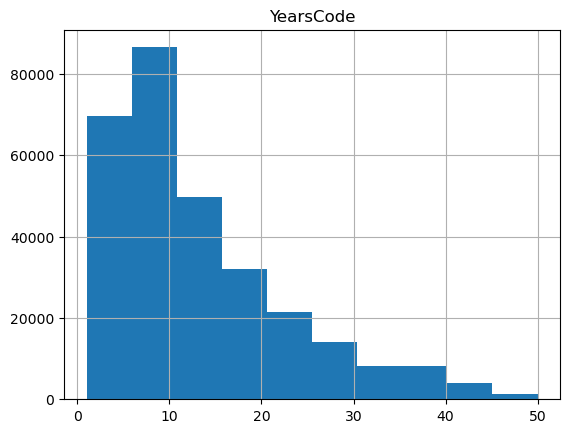

In [6]:
df.hist()

Q1 - What is the most reported coding experience in years?
Analysis - The most reported coding experience is 10 years which is below the reported average of 13 years but matches the reported median of 10 years.

In [7]:
df.describe()

,YearsCode
count,294888.000000
mean,13.238870
std,10.018758
min,1.000000
25%,6.000000
50%,10.000000
75%,18.000000
max,50.000000


In [8]:
# Clean EdLevel column by replacing verbose string with readable
# concise value.
df = df.dropna(subset=['EdLevel']).reset_index(drop=True)
dt = df['EdLevel']
dt = (dt.where
      (~dt.str.contains('Master',
                        case=False, regex=False), 'MA/MS/MEng/MBA'))
dt = (dt.where
      (~dt.str.contains('Bachelor',
                        case=False, regex=False), 'BA/BS/BEng'))
dt = (dt.where
      (~dt.str.contains('Other doctoral degree',
                        case=False, regex=False), 'Doctorate'))
dt = (dt.where
      (~dt.str.contains('Secondary',
                        case=False, regex=False), 'HS'))
dt = (dt.where
      (~dt.str.contains('Some college',
                        case=False, regex=False), 'SomeColl'))
dt = (dt.where
      (~dt.str.contains('Professional',
                        case=False, regex=False), 'Doctorate'))
dt = (dt.where
      (~dt.str.contains('Something else',
                        case=False, regex=False), 'Unknown'))
dt = (dt.where
      (~dt.str.contains('Primary',
                        case=False, regex=False), 'Elem/Mid'))
dt = (dt.where
      (~dt.str.contains('Associate',
                        case=False, regex=False), 'AA/AS'))
df['EdLevel'] = dt

# Copy edlevel values into edlevelnew column and convert values to
# integers.
normalized2 = df['EdLevel'].astype('string')
_ed2_pd = normalized2
_ed2_stripped = _ed2_pd.str.strip()
_na_like2 = {'na', 'nan', 'n/a', 'n\\a'}
normalized2 = _ed2_pd.mask(_ed2_stripped.eq('') | _ed2_stripped.str.casefold().
                           isin(_na_like2), pd.NA)
ed_map2 = {
    "Doctorate": 7,
    "MA/MS/MEng/MBA": 6,
    "BA/BS/BEng": 5,
    "AA/AS": 4,
    "SomeColl": 3,
    "HS": 2,
    "Elem/Mid": 1,
    "Unknown": 0,
}
df['EdLvlNew'] = normalized2.map(ed_map2).fillna(0).astype(int)

Q2 - What type of education is most reported in the data?

Answer - A bachelors was reported in the data over 120k times which is almost twice as much as reported masters degree according to the bar chart below.

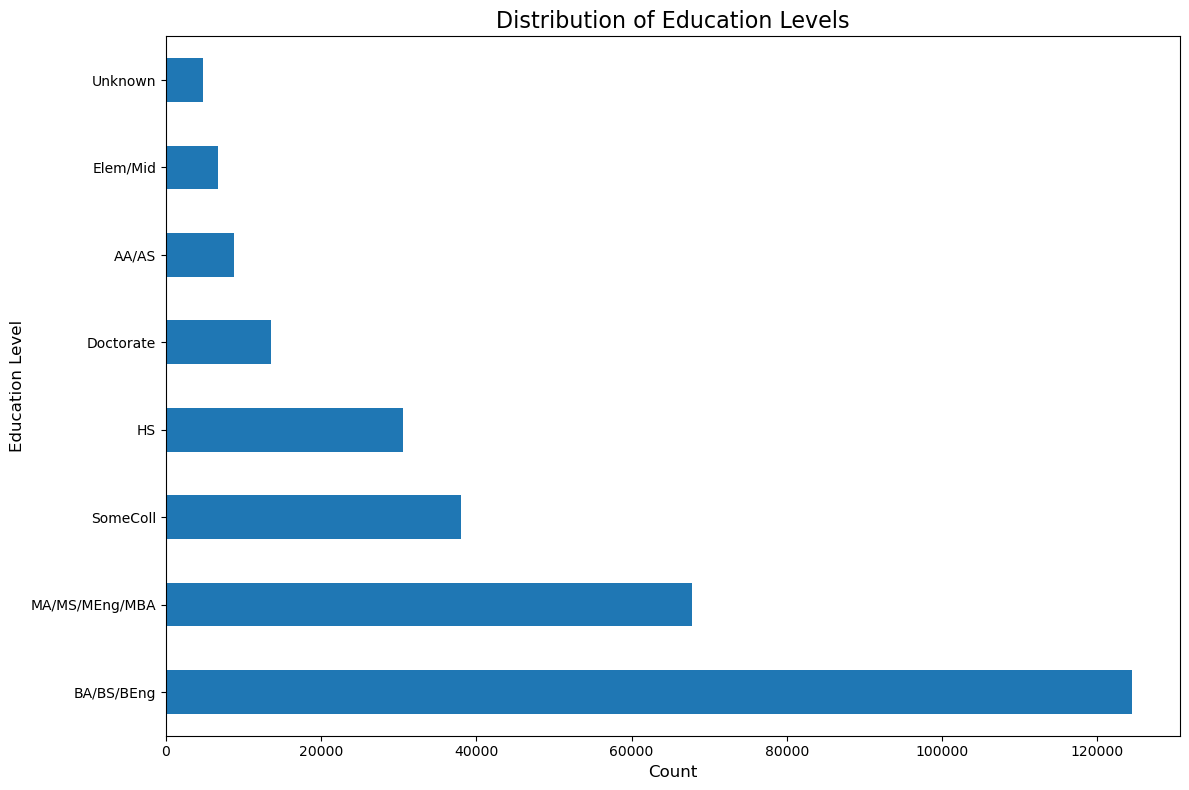

In [9]:
plt.figure(figsize=(12, 8))
ed_counts = df['EdLevel'].value_counts()
ed_counts.plot(kind='barh')
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
# Make values in age column more concise, copy those values to the 
# AgeNew column, and convert values to integers.
df['Age'] = (df['Age'].replace('', 'Not stated').fillna
             ('Not stated'))
def _clean_age_noregex(val) -> str:
    if val is None:
        return 'Unknown'
    s = str(val).strip()
    if s.casefold() == 'prefer not to say':
        return 'Not stated'
    tokens = s.split()
    result = []
    i = 0
    while i < len(tokens):
        if tokens[i].casefold() == 'years':
            if i + 1 < len(tokens) and tokens[i + 1].casefold() == 'old':
                i += 2
                continue
            i += 1
            continue
        result.append(tokens[i])
        i += 1
    return ' '.join(result).strip()
age_pd = df['Age'].astype('string').apply(_clean_age_noregex)
df['Age'] = age_pd
df = df.drop(df[df['Age'] == 'Unknown'].index)
age_mapping = {
    "65 or older": 7,
    "55-64": 6,
    "45-54": 5,
    "35-44": 4,
    "25-34": 3,
    "18-24": 2,
    "Under 18": 1,
    "Not stated": 0,
}
df["AgeNew"] = df["Age"]
for key, value in age_mapping.items():
    df["AgeNew"] = df["AgeNew"].str.replace(key, str(value))
df["AgeNew"] = pd.to_numeric(df["AgeNew"], errors='coerce')

Q3 - Which age group is most reported in the data between 2021 and 2024?

Answer - The 25 to 34-year old group was most reported and was nearby double that of the 18 to 24-year old groups. Possibly indiciating that education does play a role in coding experience since older people might have more time to pursue additional degress. We will need to run a model to verify this hypothesis.

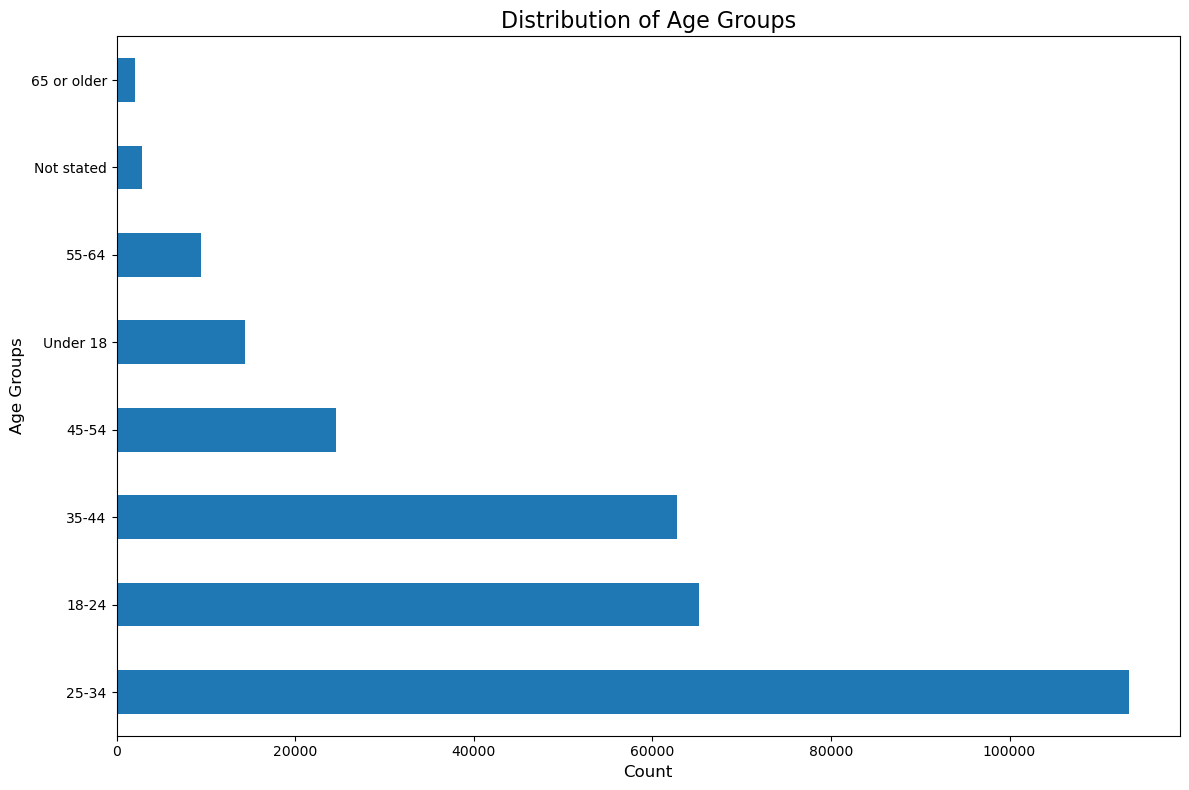

In [11]:
plt.figure(figsize=(12, 8))
ed_counts = df['Age'].value_counts()
ed_counts.plot(kind='barh')
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
# Reduce verboseness of Devtype column.
df['DevType'] = df['DevType'].fillna('Not Specified')
df['DevType'] = df['DevType'].astype('string')
dt = df['DevType']

# 1) Broad "Developer" group
dt = (dt.where
      (~dt.str.contains('Developer',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('DevOps',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineering manager',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineer, site reliability;Educator;' 
                        'Database administrator',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Research & Development role',
                        case=False,regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineer, site reliability',
                        case=False,regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Cloud infrastructure engineer;Scientist',
                        case=False, regex=False), 'Developer'))

# 2) Data roles
dt = (dt.where
      (~dt.str.contains('Data scientist or machine learning specialist',
                        case=False, regex=False), 'Data Scientist'))
dt = (dt.where
      (~dt.str.contains('Scientist',
                        case=False, regex=False),'Data Scientist'))
dt = (dt.where
      (~dt.str.contains('Engineer, data',
                        case=False, regex=False),'Data Engineer'))
dt = (dt.where
      (~dt.str.contains('Data engineer',
                        case=False, regex=False),'Data Engineer'))
dt = (dt.where
      (~dt.str.contains('Engineer, data;Academic researcher',
                        case=False, regex=False), 'Data Analyst'))
dt = (dt.where
      (~dt.str.contains('Data or business analyst',
                        case=False,regex=False), 'Data Analyst'))

# 3) Other catch-alls
dt = (dt.where
      (~dt.str.contains('Other',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Project manager',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Product manager',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Educator;Designer',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Student;Designer;Marketing or sales professional',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Educator;Blockchain',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Educator',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Designer',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Academic researcher',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Marketing or sales professional',
                        case=False,regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Student',
                        case=False, regex=False), 'Other'))

# 4) Specific titles
dt = (dt.where
      (~dt.str.contains('Scientist;Blockchain',
                        case=False,regex=False), 'Blockchain'))
dt = (dt.where
      (~dt.str.contains('Senior Executive (C-Suite, VP, etc.)',
                        case=False, regex=False), 'Executive'))
dt = (dt.where
      (~dt.str.contains('Cloud infrastructure engineer',
                        case=False,regex=False), 'Cloud Engineer'))
dt = (dt.where
      (~dt.str.contains('Security professional',
                        case=False, regex=False), 'Cyber/Network Engineer'))
dt = (dt.where
      (~dt.str.contains('System administrator',
                        case=False,regex=False), 'IT'))
dt = (dt.where
      (~dt.str.contains('Database administrator',
                        case=False,regex=False), 'IT'))
dt = (dt.where
      (~dt.str.contains('Hardware Engineer',
                        case=False,regex=False), 'IT'))
df['DevType'] = dt
df = df.drop(df[df['DevType'] == 'Not Specified'].index)

# Copy new values from DevType column to DevTypeNew column and convert
# values to integers.
dev_type_mapping = {
    "Developer": 7,
    "Data Scientist": 7,
    "Data Engineer": 7,
    "Cloud Engineer": 7,
    "Cyber/Network Engineer": 6,
    "IT": 5,
    "Blockchain": 4,
    "Executive": 3,
    "Data Analyst": 2,
    "Other": 1,
}
df["DevTypeNew"] = df["DevType"]
for key, value in dev_type_mapping.items():
    df["DevTypeNew"] = df["DevTypeNew"].str.replace(key, str(value))
df['DevTypeNew'] = df['DevTypeNew'].astype(int)

Q4 - What is the most reported development type (work role)?

Answer - The developer was the most reported work role dwarfing all other work roles including the data science work role, indicating that coding experience is significnatly more important to developers than data scientists. This could also be because data science is relatively new compared to developers. Interestingly, the data science work role was reported less than the 'Other' workroles which included academics, or hobbysts.

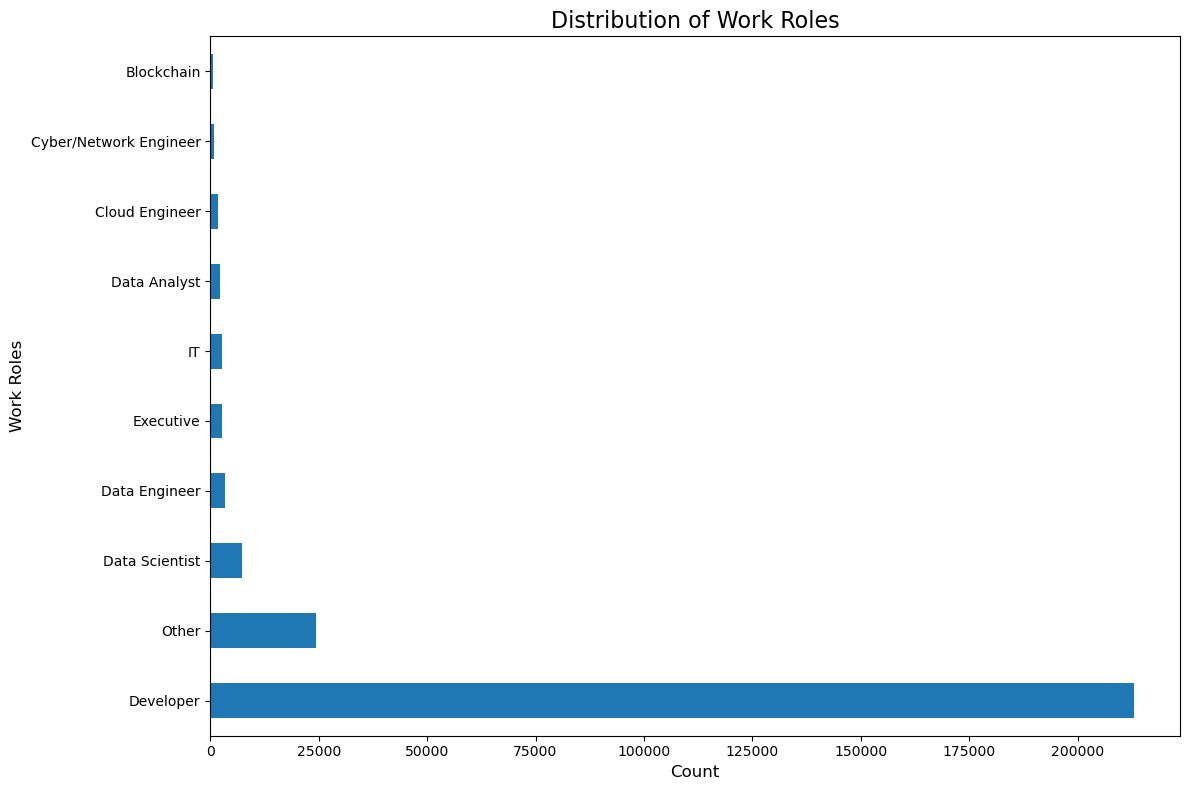

In [13]:
plt.figure(figsize=(12, 8))
ed_counts = df['DevType'].value_counts()
ed_counts.plot(kind='barh')
plt.title('Distribution of Work Roles', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Work Roles', fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
#Simplify MainBranch values
mainbranch_mapping = {
    'I am a developer by profession': 'Dev',
    'I am a student who is learning to code': 'Student',
    'I used to be a developer by profession, but no longer am'
    : 'DevPrevious',
    'I am not primarily a developer, but I write code sometimes as part of '
    'my work': 'CodeForWork',
    'I code primarily as a hobby'
    : 'Hobby',
    'None of these'
    : 'Unknown',
    'I am learning to code'
    : 'Student',
    'I am not primarily a developer, but I write code sometimes as part of '
    'my work/studies': 'CodeForWorkStudy'
}
df['MainBranch'] = (df['MainBranch'].astype('string').str.strip().map
                    (mainbranch_mapping))
df['MainBranch'] = df['MainBranch'].fillna('Unknown')

In [15]:
# Clean country column and convert names to abbreviations where possible.
_country = df['Country'].astype('string').str.strip()
_exact_map = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA',
    'Bosnia and Herzegovina': 'Bosnia',
    'Brunei Darussalam': 'Brunei',
    "Côte d'Ivoire": 'Ivory Coast',
    "CÃ´te d'Ivoire": 'Ivory Coast',
    'Central African Republic': 'CAR',
    'Democratic Republic of the Congo': 'DRC',
    'Republic of Moldova': 'Maldova',
    'Republic of North Macedonia': 'N. Macedonia',
    'The former Yugoslav Republic of Macedonia': 'N. Macedonia',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
}
_country = _country.replace(_exact_map)
_lower = _country.str.casefold()
_country = (_country.mask(_country.str.startswith
                          ('Congo, Republic of the',na=False),
                          'Congo'))
_country = _country.mask(_lower.str.contains
                         ('hong kong',na=False,regex=False),
                         'Hong Kong')
_country = _country.mask(_country.str.startswith
                         ('Iran, Islamic Republic of',na=False),
                         'Iran')
_country = _country.mask(_country.eq
                         ("Lao People's Democratic Republic"),
                         'Laos')
_country = _country.mask(_country.str.startswith
                         ('Micronesia, Federated States ''of',na=False),
                         'Micronesia')
_country = _country.mask(_country.isin
                         (['Republic of Korea','South Korea']),
                         'S. Korea')
_country = _country.mask(_country.eq
                         ("Democratic People's Republic of Korea"),
                         'N. Korea')
_country = _country.mask(_country.str.startswith
                         ('Venezuela, Bolivarian Republic'' of', na=False),
                         'Venezuela')
_country = _country.mask(_lower.eq
                         ('hong kong'),
                         'China')
df['Country'] = _country

Q5 - Which countries have the most coding experience?

Answer - The US has a little less than half of the coding talent from a total numbers perspective. This might explain why most of the top tech companies are American. It would be interesting to see how the data changes when we account for coding talent against total population for each country. 

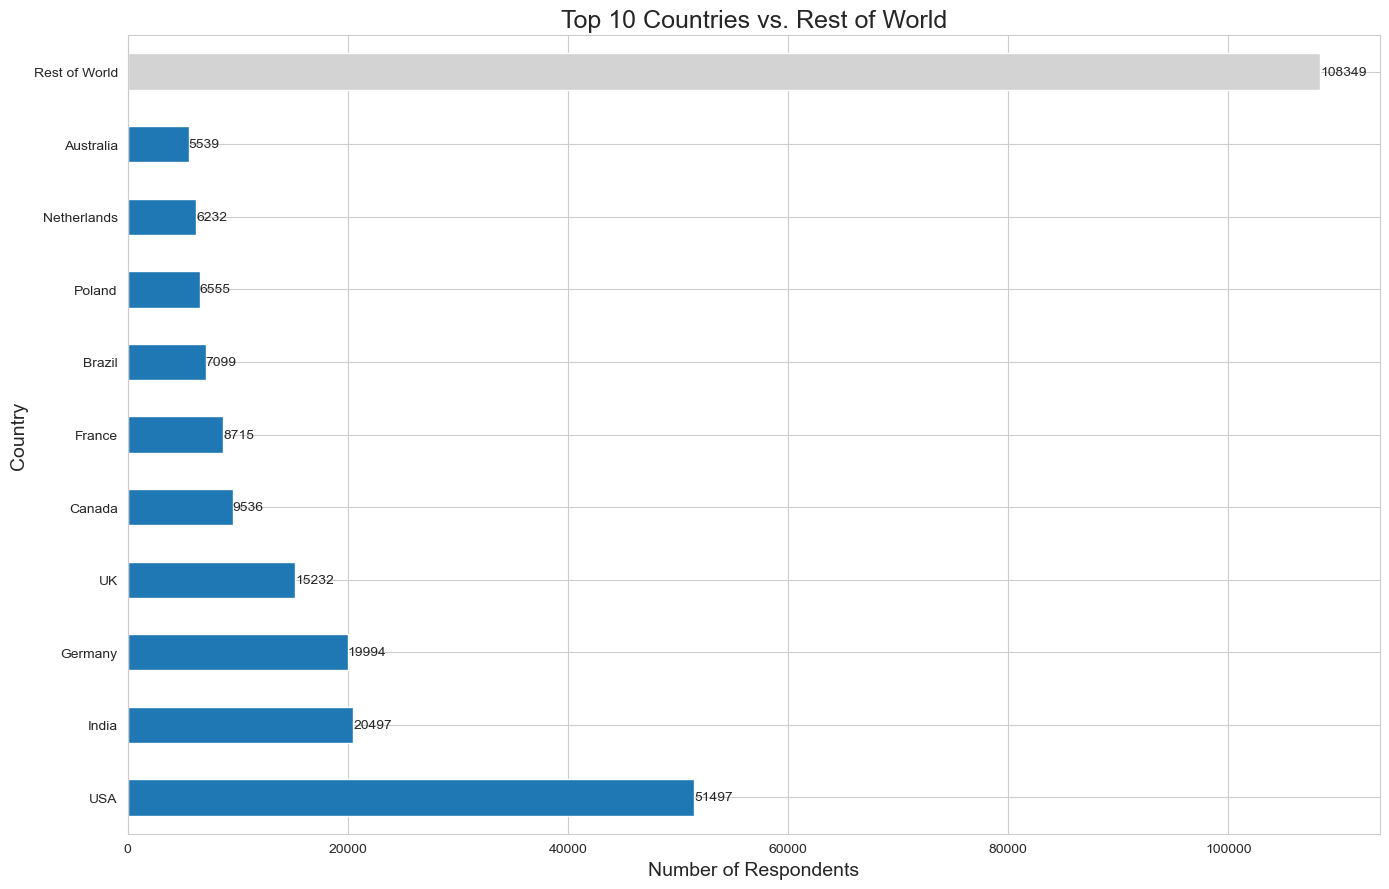

In [16]:
# Bar chart showing top 10 countries reported in the data compared
# to rest of the world.
sns.set_style("whitegrid")
plt.figure(figsize=(14, 9))
country_counts = df['Country'].value_counts()
top_10_countries = country_counts.head(10)
other_countries_sum = country_counts[10:].sum()
plot_data = top_10_countries.copy()
plot_data["Rest of World"] = other_countries_sum
ax = plot_data.plot(kind='barh', color=['#1f77b4'] * 10 + ['#d3d3d3'])  # Last bar gray
plt.title('Top 10 Countries vs. Rest of World', fontsize=18)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Country', fontsize=14)
for i, v in enumerate(plot_data):
    ax.text(v + 5, i, str(v), va='center')
plt.tight_layout()
plt.show()


# Normalize the data

In [21]:
# Normalize data
column_names_to_normalize = ['YearNorm']
df[column_names_to_normalize] = ((df[column_names_to_normalize]
                                 -df[column_names_to_normalize].min()) /
                                 (df[column_names_to_normalize].max()
                                 -df[column_names_to_normalize].min()))
dp = df[['AgeNew', 'DevTypeNew', 'EdLvlNew', 'YearNorm']]

# Target and feature variables set for model training.
y = dp['YearNorm']
X = dp[['AgeNew', 'DevTypeNew', 'EdLvlNew']]

# Train a random forest regressor model

This model was selected because the target variable is continuous while the feature variables are ordinal categories.

In [22]:
# Model train start.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create a Random Forest Regressor. Random forest chosen since target variable
# is continuous and feature variables are ordinal.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Q6 - How does age, work role, and education impact coding experience?

Answer - These feature variables definitely impact coding experience based on a solid model with a good R-squared score of 63.92%. The model was off by less than a year according to the mean squared error of 0.0150.

In [14]:
# Make predictions.
y_pred = rf_model.predict(X_test)

# Calculate regression metrics using numpy.
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  

# Calculate regression metric R2 using sklearn.
r2 = r2_score(y_test, y_pred)  

# Print regression metrics.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0150
Root Mean Squared Error: 0.1226
Mean Absolute Error: 0.0903
R² Score: 0.6392


Q7 - Between age, work role, and education, which variable impacts coding experience the most?

Answer - When we isoate the features, it turns out the age is the single best predicter for coding experience while work role and education have significantly less influence.

In [23]:
X = dp[['AgeNew']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  
r2 = r2_score(y_test, y_pred)  

# Print regression metrics for age.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0153
Root Mean Squared Error: 0.1235
Mean Absolute Error: 0.0911
R² Score: 0.6340


In [24]:
X = dp[['DevTypeNew']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  
r2 = r2_score(y_test, y_pred)  

# Print regression metrics for age.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0413
Root Mean Squared Error: 0.2031
Mean Absolute Error: 0.1604
R² Score: 0.0106


In [25]:
X = dp[['EdLvlNew']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  
r2 = r2_score(y_test, y_pred)  

# Print regression metrics for age.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0398
Root Mean Squared Error: 0.1994
Mean Absolute Error: 0.1563
R² Score: 0.0461
